## **#1 Import Libraries**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets

import pandas as pd
from sklearn.model_selection import train_test_split

import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

## **#2 Load Dataset**

In [2]:
dataset_url = 'https://media.githubusercontent.com/media/mohammadbinzouman/Online-Payments-and-Fraud-Detection/main/Dataset/OnlinePayments.csv'
df = pd.read_csv(dataset_url)

## **#3 Create Model + Preprocessing**

In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def cost_function(f_wb, y):
    epsilon = 1e-5 
    return (-y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)).mean()

In [5]:
# Computes the gradient for logistic regression.
def compute_gradient(X, y, w, b, f_wb, lambda_=None): 

    m = X.shape[0]
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    dj_dw = np.dot(X.T, f_wb - y) / m
    dj_db = np.sum(np.subtract(f_wb, y)) / m

    return dj_db, dj_dw

In [6]:
# here alpha is the learning rate, X is the feature matrix, y is the target matrix.
def logistic_reg(alpha, X, y, max_iterations=70000):
    w = np.zeros(X.shape[1])
    b = 0.

    # An array to store cost J at each iteration for graphing later.
    J_history = []

    for iterations in range(max_iterations):
        z = np.dot(X, w) + b
        f_wb = sigmoid_function(z)
        dj_db, dj_dw = compute_gradient(X, y, w, b, f_wb)

        w = w - alpha * dj_dw  # updating the weights
        b = b - alpha * dj_db

        z = np.dot(X, w) + b
        f_wb = sigmoid_function(z)
        J = cost_function(f_wb, y)

        J_history.append(J)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if iterations% math.ceil(max_iterations/10) == 0 or iterations == (max_iterations-1):
          print(f"Iteration {iterations:4}: Cost= {J}")

        ''' if iterations % 100 == 0:
            print(f"loss for itreration {iterations}: {J} \t")  # printing the loss after every 100 iterations '''

    return w, b, J_history

In [7]:
# Transform categorical features into numeric.
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                             "CASH_IN": 3, "TRANSFER": 4,
                             "DEBIT": 5})
print(df.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [8]:
# Split the data into X = independent variables, y = depndent variable.
X = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig", 'oldbalanceDest', 'newbalanceDest']])
y = np.array(df[["isFraud"]])

In [9]:
# Since the dataset is huge I will decrease its size to avoid crashes due to memory usage, and to save time.
rus = RandomUnderSampler(sampling_strategy=0.2)
X_res, y_res = rus.fit_resample(X, y)

print('X Shape:', X.shape)
print('y Shape:', y.shape)
print()
print('X_res Shape:', X_res.shape)
print('y_res Shape:', y_res.shape)

X Shape: (6362620, 6)
y Shape: (6362620, 1)

X_res Shape: (49278, 6)
y_res Shape: (49278,)


In [10]:
# Use standard scaler to avoid runtime errors after the under sampling step.
sc_X = StandardScaler()
X_res = sc_X.fit_transform(X_res)

In [11]:
# Target variable class distribution.
print('Target variable class distribution of [y]\n', pd.DataFrame(y).value_counts())
print()
print('Target variable class distribution of [y_res]\n', pd.DataFrame(y_res).value_counts()) 

Target variable class distribution of [y]
 0    6354407
1       8213
dtype: int64

Target variable class distribution of [y_res]
 0    41065
1     8213
dtype: int64


In [12]:
# Split into train test sets.
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.10, random_state=42)

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print()
print('X_test Shape: ', X_test.shape)
print('y_test Shape:', y_test.shape)
print()
print('Target variable class distribution of [y_train]\n', pd.DataFrame(y_train).value_counts())
print()
print('Target variable class distribution of [y_test]\n', pd.DataFrame(y_test).value_counts())

X_train Shape:  (44350, 6)
y_train Shape:  (44350,)

X_test Shape:  (4928, 6)
y_test Shape: (4928,)

Target variable class distribution of [y_train]
 0    37006
1     7344
dtype: int64

Target variable class distribution of [y_test]
 0    4059
1     869
dtype: int64


## **#4 Evaluation**

Iteration    0: Cost= 0.6792087390780421
Iteration 1000: Cost= 0.33152209023284906
Iteration 2000: Cost= 0.3211201245816456
Iteration 3000: Cost= 0.31291787482125993
Iteration 4000: Cost= 0.305560088140723
Iteration 5000: Cost= 0.29885244641368347
Iteration 6000: Cost= 0.2927458806434727
Iteration 7000: Cost= 0.28719447541086146
Iteration 8000: Cost= 0.2821378854683643
Iteration 9000: Cost= 0.27752087044468216
Iteration 9999: Cost= 0.27330128690081484
w:  [ 0.3322306   1.12319039  5.66875736 -6.23639574  0.84920685 -1.51234652]
b:  -1.730698545467671


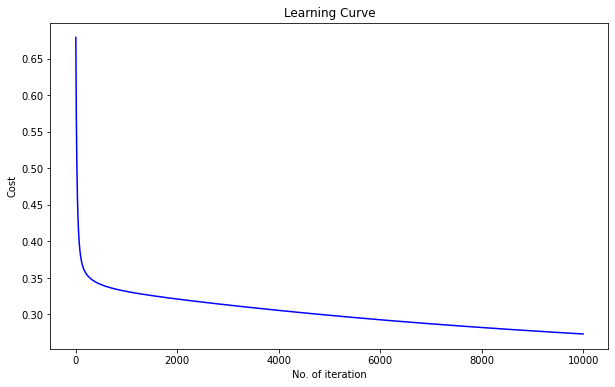

<Figure size 432x288 with 0 Axes>

In [13]:
alpha = 0.1
iterations = 10000

w, b, J_history = logistic_reg(alpha, X_train, y_train, iterations)

print("w: ", w)  # printing our weights vector and bias.
print("b: ", b)

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.0, iterations, iterations), J_history, color="b")
plt.xlabel('No. of iteration')
plt.ylabel('Cost')
plt.title('Learning Curve')
plt.show()
plt.clf()

# alpha=1
# Iteration 69999: Cost= 0.15199092130059647
# Iteration 9999: Cost= 0.1886700074692684
# Iteration 4999: Cost= 0.20932371925898738

In [14]:
# Predict whether the label is 0 or 1 using learned logistic regression parameters w and b.
def predict(X): 
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid_function(z_wb)
        #print(f_wb)
        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0
        
    return p

In [15]:
#Compute accuracy on our training set
p = predict(X_train)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))
print()

#Compute accuracy on our testing set
p = predict(X_test)
print('Test Accuracy: %f'%(np.mean(p == y_test) * 100))

Train Accuracy: 89.781285

Test Accuracy: 88.839286


In [16]:
# prediction on new examples. [0 = Not Fraud, 1 = Fraud]
#                    type      amount      oldbalanceOrg	   newbalanceOrig	   oldbalanceDest     newbalanceDest
features = np.array([[2,      9839.64,        170136.0,        160296.36,            0,                 0]]) # no fraud.
print(predict(features)) 

features = np.array([[2,      9839.64,        170136.0,        150296.36,            0,                 0]]) # Fraud.
print(predict(features)) 

[0.]
[1.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
